In [ ]:
# import sys, os, re
# import importlib
# import numpy as np
# from functools import reduce
# import matplotlib.pyplot as plt
# from matplotlib.colors import to_rgba
# from pathlib import Path
# from scipy.signal import find_peaks
# from scipy.ndimage import uniform_filter1d, percentile_filter
# from scipy.stats import binned_statistic, zscore
# import scipy.stats as stats
# import suite2p 
# from suite2p.extraction import dcnv
# import pandas as pd
# import yaml
# import copy
# import glob 
# import plotly.graph_objects as go
# import plotly.io as pio
# import seaborn as sns
# import wesanderson
# from cycler import cycler
# import palettes
# import subprocess
# import json
# pio.renderers.default = "browser"

# import neural_analysis_helpers
# importlib.reload(neural_analysis_helpers)

# from neural_analysis_helpers import get_psth, plot_avg_psth, split_psth, get_tuned_neurons, plot_avg_goal_psth, \
#     get_landmark_psth, plot_avg_landmark_psth, plot_landmark_psth_map, plot_condition_psth_map, get_map_correlation, \
#     get_tuned_neurons_shohei, plot_goal_psth_map, plot_all_sessions_goal_psth_map, get_map_correlation_matrix, \
#     get_landmark_ids, get_landmark_categories, load_vr_behaviour_data, get_imag_rew_idx, load_nidaq_behaviour_data, \
#     get_landmark_category_rew_idx, get_rewards, get_lm_entry_exit, get_rewarded_landmarks

# # import roi_tracking_helpers
# # importlib.reload(roi_tracking_helpers)
# # from roi_tracking_helpers import roicat_visualize_tracked_rois

# import parse_session_functions
# importlib.reload(parse_session_functions)
# from parse_session_functions import load_session, load_config, create_session_struct, get_lap_idx, get_lm_idx, calc_laps_needed, get_active_goal, get_rewarded_lms, get_lms_visited

# tm_palette = palettes.met_brew('Tam',n=123, brew_type="continuous")
# tm_palette = tm_palette[::-1]
# # color_scheme = wesanderson.film_palette('Darjeeling Limited',palette=0)
# # custom_cycler = cycler(color=color_scheme)

# hfs_palette = np.array(palettes.met_brew('Archambault',n=20, brew_type="continuous"))

In [ ]:
import sys, os, re
import importlib
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from pathlib import Path
from scipy.signal import find_peaks
from scipy.ndimage import uniform_filter1d, percentile_filter
from scipy.stats import binned_statistic, zscore
import scipy.stats as stats
import suite2p 
from suite2p.extraction import dcnv
import pandas as pd
import yaml, json
import copy
import glob 
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import wesanderson
from cycler import cycler
pio.renderers.default = "browser"

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join('..', 'preprocessing')))
sys.path.append(os.path.abspath(os.path.join('..', 'cellTV')))

import preprocessing.parse_session_functions_cohort2 as parse_session_functions
import neural_analysis_helpers
import alternation_analysis_helpers as alternation
import cellTV.cellTV_functions_cohort2 as cellTV

importlib.reload(parse_session_functions)
importlib.reload(neural_analysis_helpers)
importlib.reload(alternation)
importlib.reload(cellTV)

import palettes
tm_palette = palettes.met_brew('Tam',n=123, brew_type="continuous")
tm_palette = tm_palette[::-1]
color_scheme = wesanderson.film_palette('Darjeeling Limited',palette=0)
custom_cycler = cycler(color=color_scheme)
hfs_palette = np.array(palettes.met_brew('Austria',n=8, brew_type="continuous"))

##### Load data

In [2]:
# Load tracked and aligned ROIs
sessions_to_align = ["ses-010_date-20250314_protocol-t4", "ses-011_date-20250315_protocol-t5"] #, "ses-010_date-20250314_protocol-t4", "ses-008_date-20250306_protocol-t3", ] 
num_sessions = len(sessions_to_align)
protocol_nums = [int(re.search(r'protocol-t(\d+)', s).group(1)) for s in sessions_to_align]

basepath = Path('/Volumes/mrsic_flogel/public/projects/AtApSuKuSaRe_20250129_HFScohort2')
mouse = 'TAA0000066'
funcimg_path = 'funcimg/Session'
alignment_path = basepath / mouse / '_'.join(f't{n}' for n in protocol_nums)
savepath = alignment_path / 'analysis' 

suffix = '_'.join(f't{n}' for n in protocol_nums)
filename = f'roicat_aligned_ROIs_{suffix}.npy'
if os.path.exists(os.path.join(alignment_path, filename)):
    idx_original_aligned = np.load(os.path.join(alignment_path, filename))
else:
    raise FileNotFoundError('The ROICaT alignment file is not found in this directory.')
    

<BarContainer object of 2 artists>

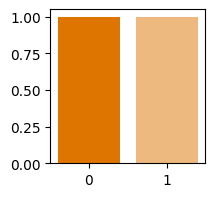

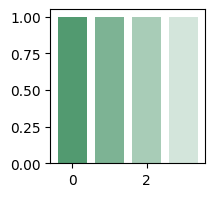

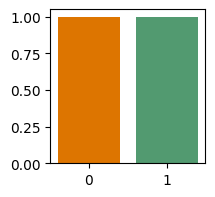

In [3]:
# Color scheme
# T3 red, T4 orange, T5 green, T6 blue, ABCD are different shades 
protocol_nums = [int(re.search(r'protocol-t(\d+)', s).group(1)) for s in sessions_to_align]

num_colors = 10 
color_palette = palettes.met_brew('Johnson',n=num_colors, brew_type="continuous")
# fig,ax = plt.subplots(1,1)
# ax.bar(range(num_colors), np.ones(num_colors), capsize=3, color=cont_palette[:num_colors])

color_scheme = {}
for s, prot in enumerate(protocol_nums):
    if prot < 5:
        alphas = np.flip(np.linspace(0.5, 1.0, 2))
    else:
        alphas = np.flip(np.linspace(0.25, 1.0, 4))

    if prot == 3:
        base_color = color_palette[0]
    elif prot == 4:
        base_color = color_palette[3]
    elif prot == 5:
        base_color = color_palette[6]
    elif prot == 6:
        base_color = color_palette[9]

    color_scheme[s] = [to_rgba(base_color, alpha=a) for a in alphas]

    fig,ax = plt.subplots(1,1, figsize=(2,2))
    ax.bar(range(len(color_scheme[s])), np.ones(len(color_scheme[s])), capsize=3, color=color_scheme[s])

fig,ax = plt.subplots(1,1, figsize=(2,2))
first_colors = [colors[0] for colors in color_scheme.values()]

ax.bar(range(len(first_colors)), np.ones(len(first_colors)), capsize=3, color=first_colors)



DF_F0 file found. Loading...
(550, 79300)
Training and Imaging
Total rewards considered here:  126
Total rewards not considered here:  0
Total assistant and manual rewards:  0
Reward time lag from lm entry:  18.0
Total licks considered here:  3436


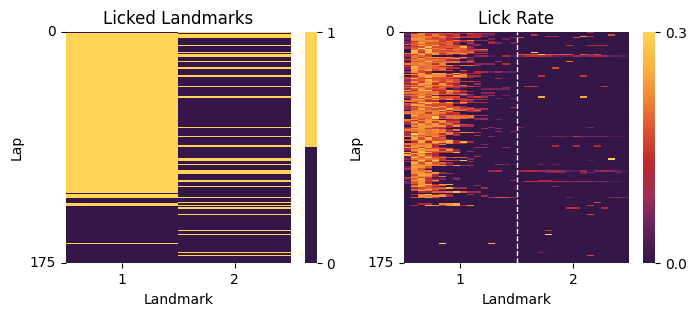

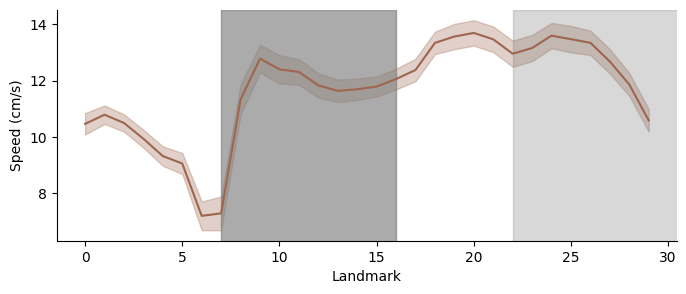

Number of laps =  1
T4 goal: 0
T4 non_goal: 3
T4 test: None
DF_F0 file found. Loading...
(624, 78437)
Training and Imaging
Total rewards considered here:  101
Total rewards not considered here:  9
Total assistant and manual rewards:  9
Reward time lag from lm entry:  29.0
Total licks considered here:  2694


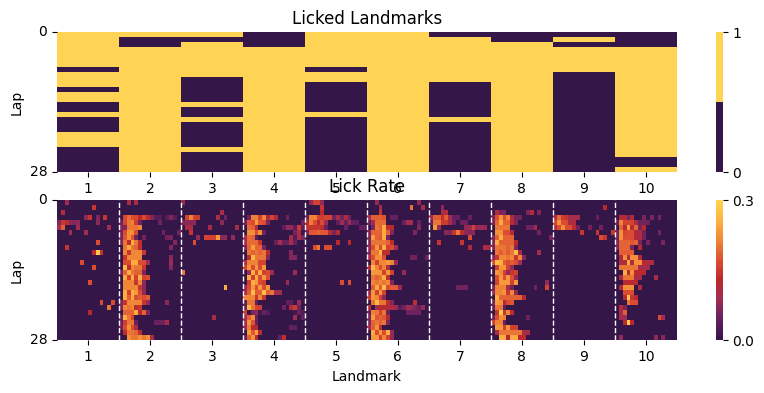

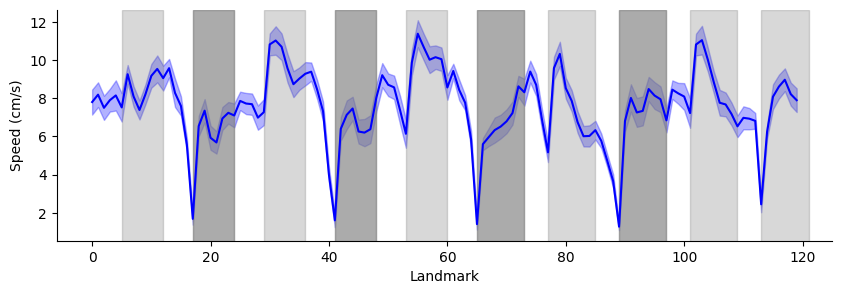

Number of laps =  1
T5 goal: [1 3 5 7]
T5 non_goal: [0 2 4 6 8]
T5 test: 9


In [ ]:
# Get session struct for each session
force_reload = True
session_struct = {}

for s, (protocol_num, sess) in enumerate(zip(protocol_nums, sessions_to_align)):

    if os.path.exists(os.path.join(basepath, mouse, sess, 'analysis', f'T{protocol_num}_session_info.npz')) and not force_reload:
        print(f'T{protocol_num} session data found. Loading...')
        session_struct[s] = np.load(os.path.join(basepath, mouse, sess, 'analysis', f'T{protocol_num}_session_info.npz'))
    
    else:
        save_path, DF_F, session = neural_analysis_helpers.load_dF_session_data(basepath, mouse, stage=f'-t{protocol_num}')

        print(f"T{protocol_num} goal: {session['goal_landmark_id']}")
        print(f"T{protocol_num} non_goal: {session['non_goal_landmark_id']}")
        print(f"T{protocol_num} test: {session['test_landmark_id']}")

        session_struct[s] = session     

        # Save session struct
        np.savez_compressed(os.path.join(basepath, mouse, sess, 'analysis', f'T{protocol_num}_session_info.npz'), session=session)


In [ ]:
# Get dF for each session
session_data = [[] for s in range(num_sessions)]

for s, sess in enumerate(sessions_to_align):
    DF_F_file = os.path.join(basepath, mouse, sess, funcimg_path, 'suite2p/plane0/DF_F0.npy')
    valid_frames_file = os.path.join(basepath, mouse, sess, 'valid_frames.npz')

    if os.path.exists(DF_F_file) and os.path.exists(valid_frames_file):
        valid_frames = np.load(valid_frames_file)['valid_frames']

        DF_F_all = np.load(DF_F_file)
        DF_F = DF_F_all[:, valid_frames]
        session_data[s] = DF_F
    else:
        raise FileNotFoundError('Either the valid_frames.npz or the DF_F0.npy file does not exist in this directory.')


Common neurons considered across all sessions: 106


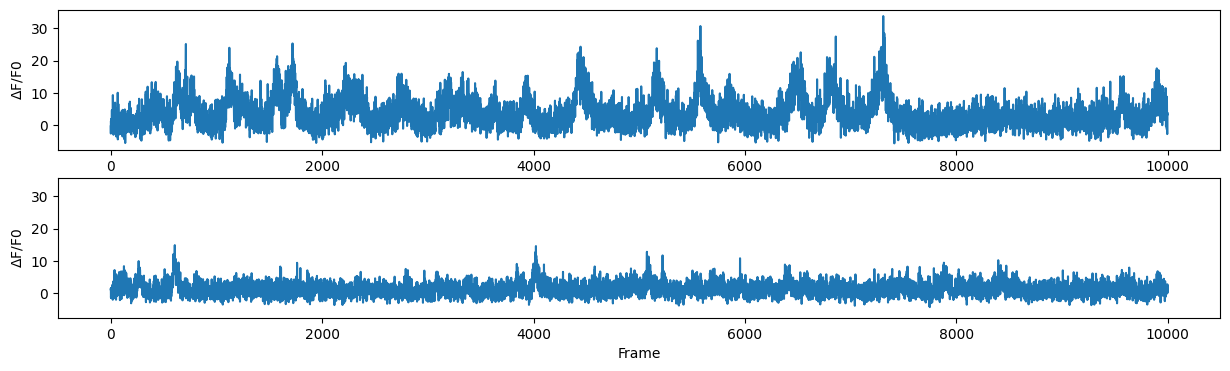

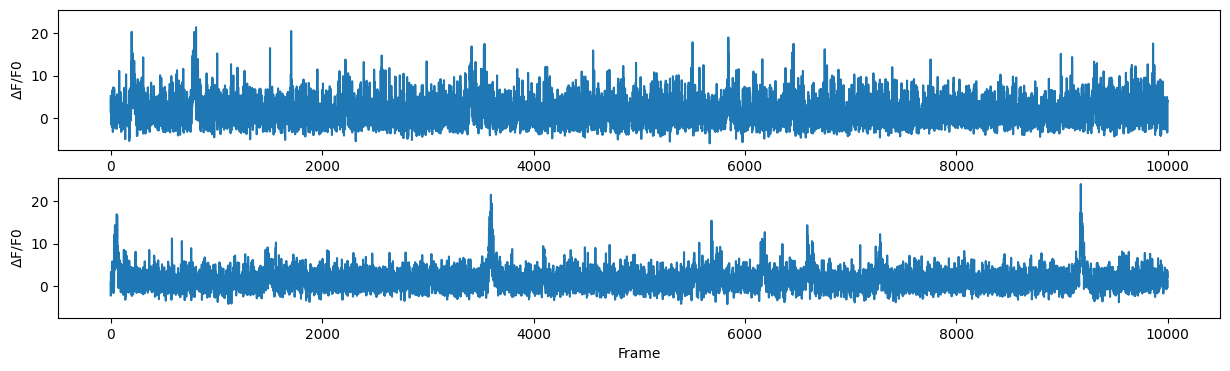

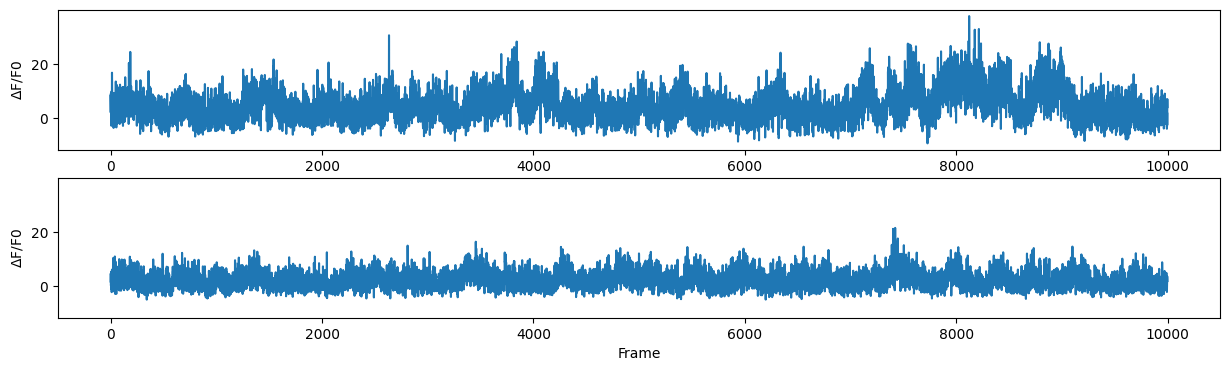

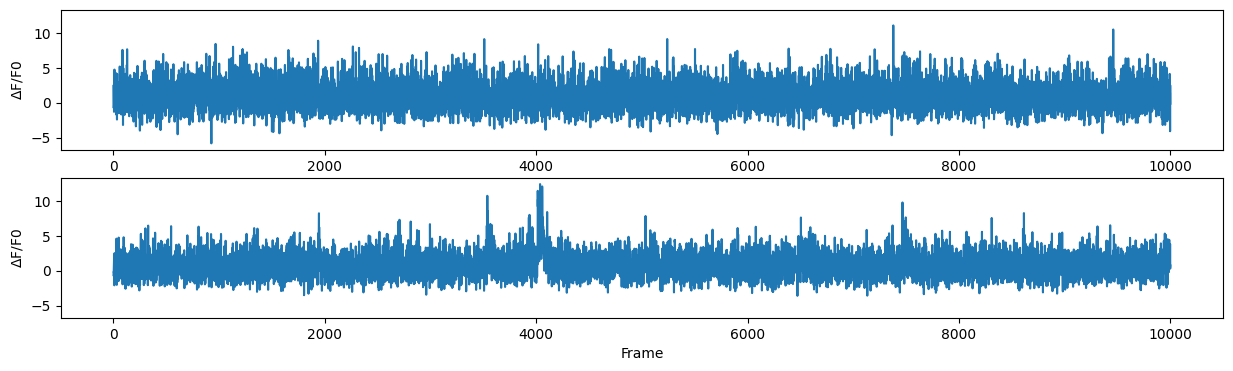

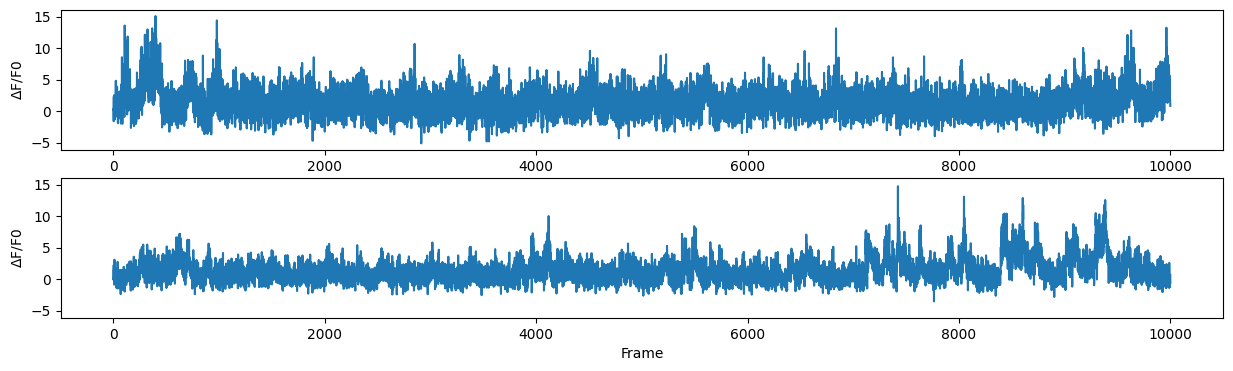

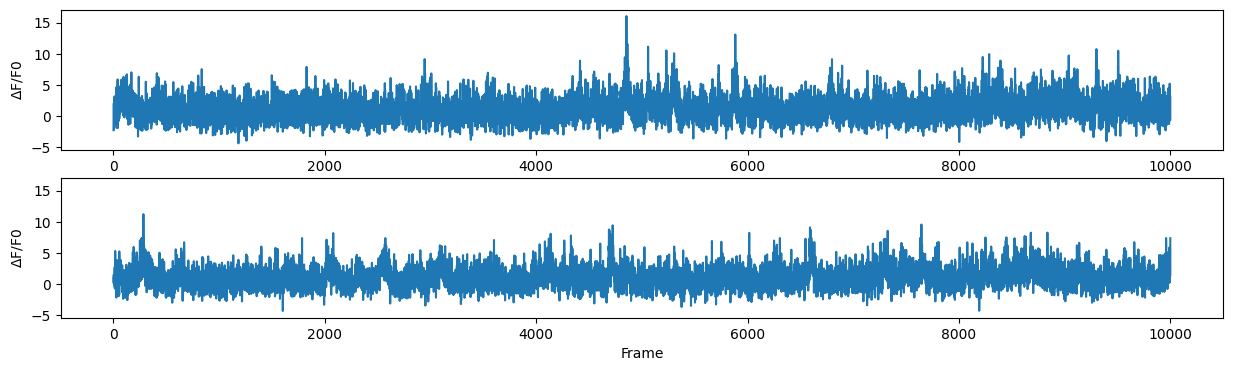

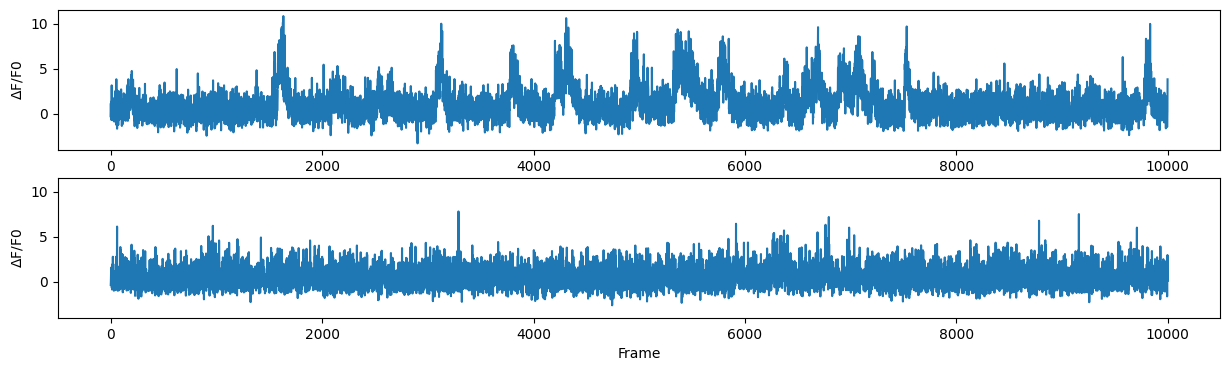

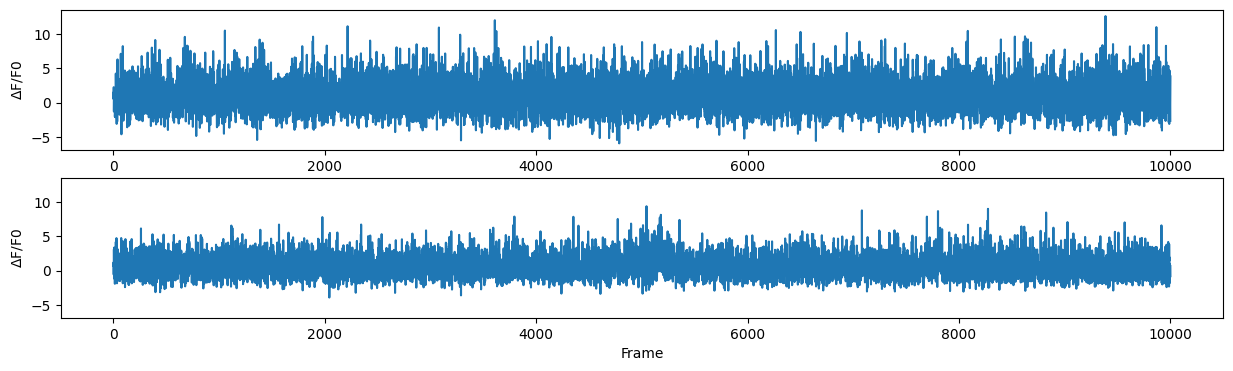

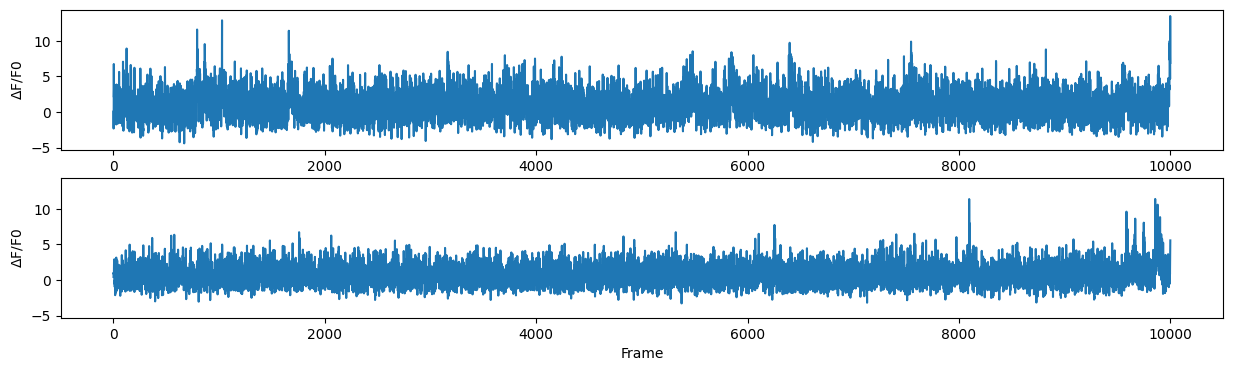

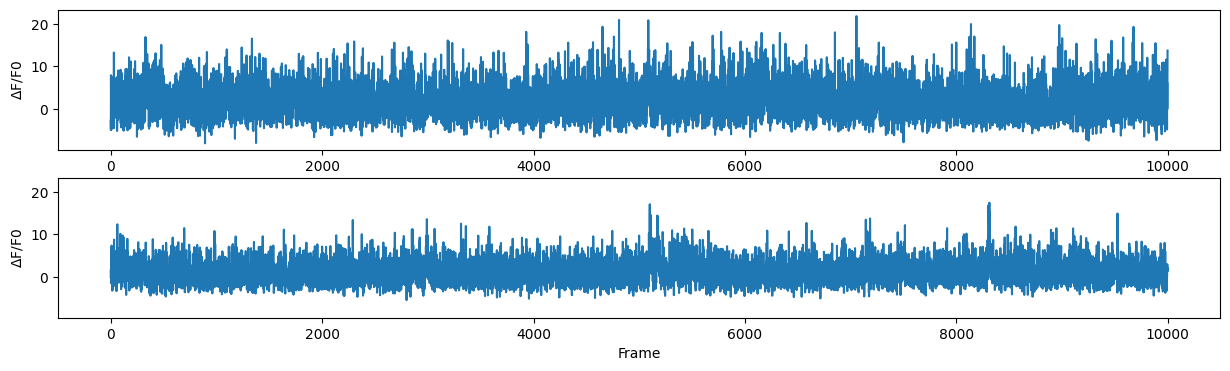

In [7]:
# Look at distribution of DF/F to select neurons

# Keep neurons that have been clustered in all sessions
idx_array = np.vstack(idx_original_aligned)  # shape: (n_sessions, n_neurons)
valid_mask = np.all(~np.isnan(idx_array), axis=0)  # Find neurons that are not nan in all sessions
valid_indices = np.where(valid_mask)[0]  # Get the indices that are valid across all sessions

# Find indices of neurons that have good signal in all sessions and are tracked across sessions
consistent_neurons = [[] for s in range(num_sessions)]
for s in range(num_sessions):
    for n, neuron in enumerate(np.array(idx_original_aligned[s][valid_indices]).astype(int)):
        deltas = session_data[s][neuron,:] - np.mean(session_data[s][neuron,:])
        # plt.hist(deltas, bins=100)
        skew = stats.skew(deltas)

        if skew > 0.5:
            consistent_neurons[s].append(n)

neuron_sets = [set(neurons) for neurons in consistent_neurons]
common_neuron_idx = list(set.intersection(*neuron_sets))  # indices of neurons
print("Common neurons considered across all sessions:", len(common_neuron_idx))

# Get the ids of these neurons  
neurons_considered_sessions = [[] for s in range(num_sessions)]  
for s in range(num_sessions):
    for neuron in np.array(idx_original_aligned[s][valid_indices[common_neuron_idx]]).astype(int):
        neurons_considered_sessions[s].append(neuron)

# Plot a few neurons
plot_range = 10000
xdata = np.arange(0, plot_range) 
for n in range(0,10):
    fig, ax = plt.subplots(num_sessions, 1, figsize=(15,4), sharey=True)
    ax = ax.ravel()
    for s in range(num_sessions):
        ax[s].plot(xdata, session_data[s][neurons_considered_sessions[s][n],0:plot_range])
        ax[s].set_xlabel('Frame')
        ax[s].set_ylabel('$\Delta$F/F0')

##### Get tracked reward-tuned neurons

In [ ]:
# Identify common neurons that are tuned to rewards
# NOTE: singificant neurons for each event are indices into that session's neurons_considered, 
# which are in turn the actual ROI ids. 

time_around = 0.5  # window around events

all_significant_neurons_reward = [[] for s in range(num_sessions)]
significant_neurons_reward_id = [[] for s in range(num_sessions)]
reward_tuned_neurons_sessions = [[] for s in range(num_sessions)]
neurons_considered = [[] for s in range(num_sessions)]
tracked_reward_tuned_neurons = [[] for s in range(num_sessions)] # reward-tuned neurons across sessions
tracked_reward_tuned_idx = [[] for s in range(num_sessions)]
results_rewards = [[] for s in range(num_sessions)]

for s, (prot, sess) in enumerate(zip(protocol_nums, sessions_to_align)):

    analysis_path = os.path.join(basepath, mouse, sess, 'analysis')
    neurons_considered_file = np.load(os.path.join(analysis_path, f'T{prot}_neurons_considered.npz'), allow_pickle=True)
    neurons_considered[s] = neurons_considered_file['arr_0']

    results_rewards[s] = np.load(os.path.join(analysis_path, f'T{prot}_rewards_analysis_{time_around}s.npz'), allow_pickle=True)
    all_significant_neurons_reward[s] = results_rewards[s]['all_significant_neurons_reward']

    # Reward-tuned neurons for each goal, where the keys correspond to goals: 1:A, 2:B, 3:C, 4:D
    if 'significant_neurons_reward_id' in results_rewards[s]:
        significant_neurons_reward_id[s] = results_rewards[s]['significant_neurons_reward_id']
    else:
        significant_neurons_reward_id[s] = None  

    # Ids of reward-tuned neurons from each session
    reward_tuned_neurons_sessions[s] = neurons_considered[s][all_significant_neurons_reward[s]]

    # Ids of reward-tuned neurons from each session that have been tracked across sessions
    tracked_reward_tuned_neurons[s] = np.intersect1d(reward_tuned_neurons_sessions[s], neurons_considered_sessions[s])
    print(f'Out of {len(neurons_considered_sessions[s])} neurons considered across all sessions, {len(tracked_reward_tuned_neurons[s])} have been previously identified as reward-tuned in T{prot}.')

    # Indices of reward-tuned neurons from each session inside the tracked array. 
    # The same indices across arrays correspond to the same neurons.
    tracked_reward_tuned_idx[s] = np.where(np.isin(neurons_considered_sessions[s], tracked_reward_tuned_neurons[s]))[0]

# Indices of tracked neurons that are reward-tuned across sessions.
consistent_reward_tuned_neuron_idx = reduce(np.intersect1d, tracked_reward_tuned_idx)


Out of 106 neurons considered across all sessions, 55 have been previously identified as reward-tuned in T4.
Out of 106 neurons considered across all sessions, 44 have been previously identified as reward-tuned in T5.


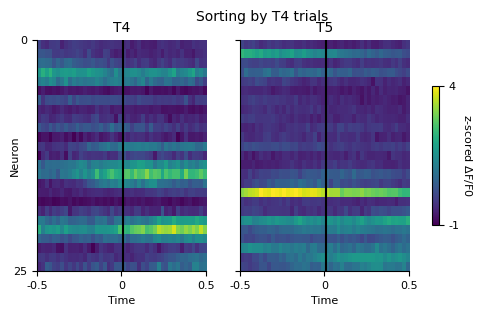

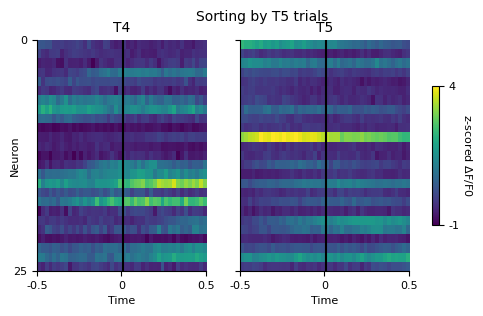

0
1


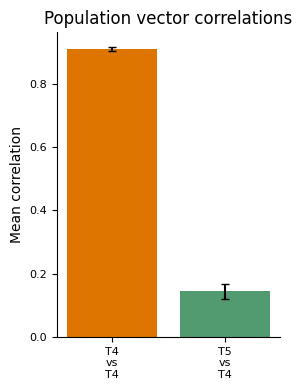

In [ ]:
# Plot reward PSTHs for each session
psths = [[] for s in range(num_sessions)]
average_psths = [[] for s in range(num_sessions)]
conditions = [f'T{prot}' for prot in protocol_nums]

for s in range(num_sessions):   
    neurons = np.array(neurons_considered_sessions[s])[consistent_reward_tuned_neuron_idx]  # ids of tracked neurons that are consistently reward-tuned 
    neuron_idx = np.where(np.isin(neurons_considered[s], neurons))[0]   # indices of these neurons inside their original list of neurons considered 

    # print(results_rewards[s]['average_reward_psth'].shape)
    average_psths[s] = results_rewards[s]['average_reward_psth'][neuron_idx]
    psths[s] = results_rewards[s]['reward_psth'][neuron_idx]

neural_analysis_helpers.plot_condition_psth_map(average_psths, conditions, zscoring=True, time_around=time_around, funcimg_frame_rate=45, save_plot=False, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons')

corrs = neural_analysis_helpers.get_map_correlation(psths, average_psths, conditions, population=True, zscoring=True, reference=0, \
                            color_scheme=[colors[0] for colors in color_scheme.values()], \
                            save_plot=False, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons', filename='FiringMap_correlation')
    

In [ ]:
# Plot reward PSTHs for each goal and get correlation across goals 
ABCD_goals = [1,2,3,4]
psths = [{} for _ in range(num_sessions)]
average_psths = [{} for _ in range(num_sessions)]
goal_ids = ['A','B','C','D']
ref_prot = 0  # session idx to use as reference i.e. how have things changed compared to that session
conditions = [f'T{prot} {goal}' if prot >= 5 else f'T{prot} A' for prot in protocol_nums for goal in (goal_ids if prot >= 5 else ['A'])]

for s, prot in enumerate(protocol_nums): 
    if prot >= 5: 
        neurons = np.array(neurons_considered_sessions[s])[consistent_reward_tuned_neuron_idx]  # ids of tracked neurons that are consistently reward-tuned 
        neuron_idx = np.where(np.isin(neurons_considered[s], neurons))[0]   # indices of these neurons inside their original list of neurons considered 

        for goal in ABCD_goals:
            psths[s][goal] = results_rewards[s]['reward_id_psth'][()][goal][neuron_idx]
            average_psths[s][goal] = results_rewards[s]['average_reward_id_psth'][()][goal][neuron_idx]

        neural_analysis_helpers.plot_goal_psth_map(average_psths[s], zscoring=True, sorting_goal=1, time_around=time_around, funcimg_frame_rate=45, save_plot=False, savepath=savepath, \
                        savedir='RewardPSTH_RewardTunedNeurons', filename=f'ABCD_Reward_PSTH_T{protocol_nums[s]}')

        # Plot correlation for each sess among goals 
        corrs = neural_analysis_helpers.get_map_correlation(psths[s], average_psths[s], conditions=goal_ids, population=True, zscoring=True, reference=1, color_scheme=color_scheme[s], \
                                save_plot=False, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons', filename=f'ABCD_FiringMap_correlation_T{protocol_nums[s]}')

if np.all(np.array(protocol_nums) >= 5):
    neural_analysis_helpers.plot_all_sessions_goal_psth_map(average_psths, conditions=conditions, zscoring=True, ref_session=ref_prot, sorting_goal=1, \
                                    time_around=time_around, funcimg_frame_rate=45, save_plot=False, savepath=savepath, \
                                        savedir='RewardPSTH_RewardTunedNeurons', filename=f'ABCD_Reward_PSTH_allSessions')
    
    _ = neural_analysis_helpers.get_map_correlation_matrix(average_psths, conditions, population=False, zscoring=True, save_plot=False, savepath=savepath, \
                                        savedir='RewardPSTH_RewardTunedNeurons', filename=f'ABCD_FiringMap_correlationMatrix_allSessions')
    

KeyError: 'reward_id_psth is not a file in the archive'

##### Compare PSTH maps across goals and sessions 

In [ ]:
# Compare reward-tuned neurons that are goal-specific across sessions 
ABCD_goals = [1,2,3,4]
goal_ids = ['A','B','C','D']
conditions = [f'T{prot} {goal}' if prot >= 5 else f'T{prot} A' for prot in protocol_nums for goal in (goal_ids if prot >= 5 else ['A'])]

## Get the neurons that are goal-specific and tracked 
tracked_reward_id_tuned_neurons = {s: {goal: [] for goal in (ABCD_goals if protocol_nums[s] >= 5 else [1])} for s in range(num_sessions)}
tracked_reward_id_tuned_idx = {s: {goal: [] for goal in (ABCD_goals if protocol_nums[s] >= 5 else [1])} for s in range(num_sessions)}
# consistent_reward_id_tuned_neuron_idx = {goal: [] for goal in (ABCD_goals if protocol_nums[s] >= 5 else [1])}

for g, goal in enumerate(ABCD_goals):
    for s, (prot, sess) in enumerate(zip(protocol_nums, sessions_to_align)):
        
        if goal not in tracked_reward_id_tuned_neurons[s]:
            continue

        # Ids of reward-tuned neurons for a specific goal from each session
        if prot < 5:
            tracked_reward_id_tuned_neurons[s][goal] = np.intersect1d(neurons_considered[s][all_significant_neurons_reward[s]], neurons_considered_sessions[s])
        else:
            tracked_reward_id_tuned_neurons[s][goal] = np.intersect1d(neurons_considered[s][significant_neurons_reward_id[s][()][goal]], neurons_considered_sessions[s])
        print(f'Out of {len(neurons_considered_sessions[s])} neurons considered across all sessions, {len(tracked_reward_id_tuned_neurons[s][goal])} have been previously identified as {conditions[g]} reward-tuned in T{prot}.')
         
        # Indices of reward-tuned neurons for a specific goal from each session inside the tracked array. 
        tracked_reward_id_tuned_idx[s][goal] = np.where(np.isin(neurons_considered_sessions[s], tracked_reward_id_tuned_neurons[s][goal]))[0]

    # Indices of tracked neurons that are reward-tuned for a specific goal across sessions.
    # consistent_reward_id_tuned_neuron_idx[goal] = reduce(np.intersect1d, [tracked_reward_id_tuned_idx[s][goal] for s in range(num_sessions) if goal in tracked_reward_id_tuned_idx[s]])


Out of 155 neurons considered across all sessions, 48 have been previously identified as T5 A reward-tuned in T5.
Out of 155 neurons considered across all sessions, 52 have been previously identified as T5 A reward-tuned in T6.
Out of 155 neurons considered across all sessions, 48 have been previously identified as T5 B reward-tuned in T5.
Out of 155 neurons considered across all sessions, 61 have been previously identified as T5 B reward-tuned in T6.
Out of 155 neurons considered across all sessions, 47 have been previously identified as T5 C reward-tuned in T5.
Out of 155 neurons considered across all sessions, 41 have been previously identified as T5 C reward-tuned in T6.
Out of 155 neurons considered across all sessions, 48 have been previously identified as T5 D reward-tuned in T5.
Out of 155 neurons considered across all sessions, 67 have been previously identified as T5 D reward-tuned in T6.


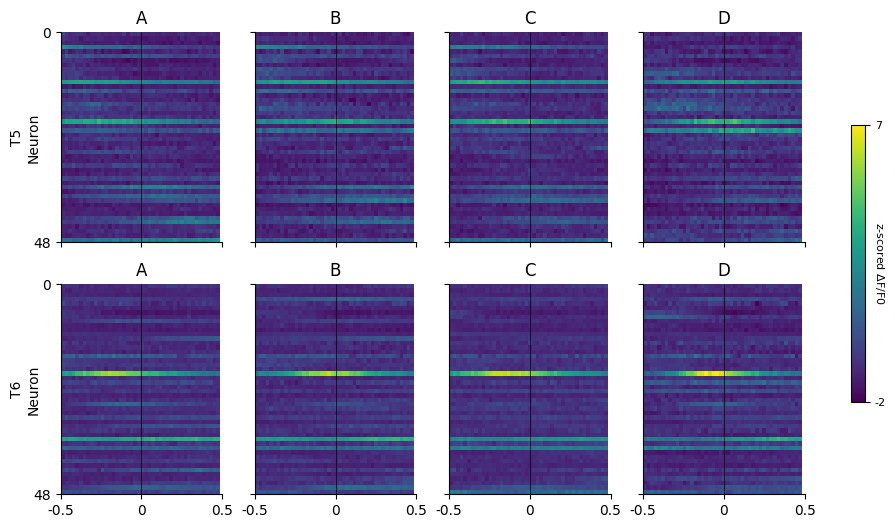

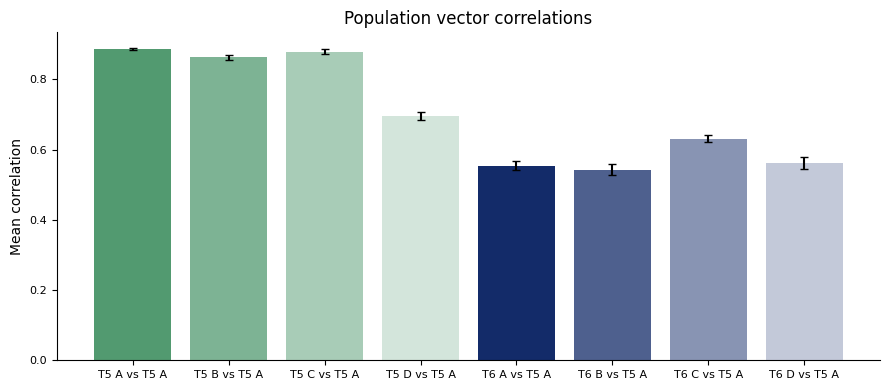

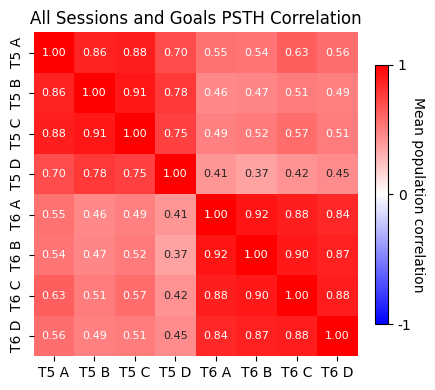

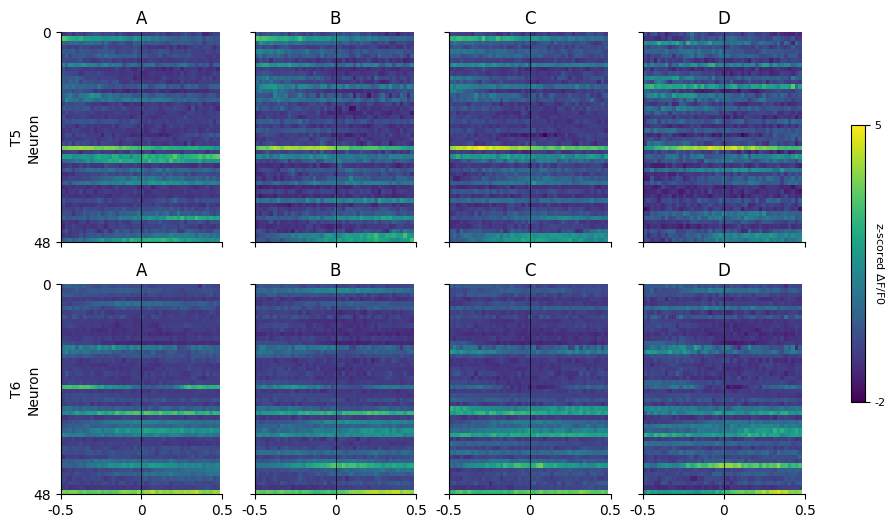

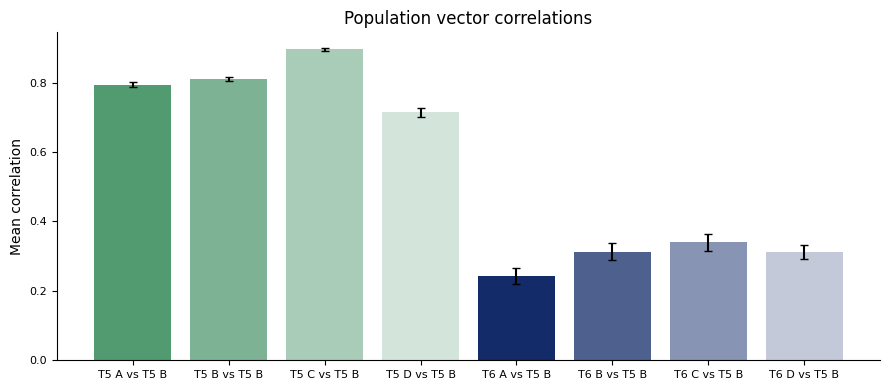

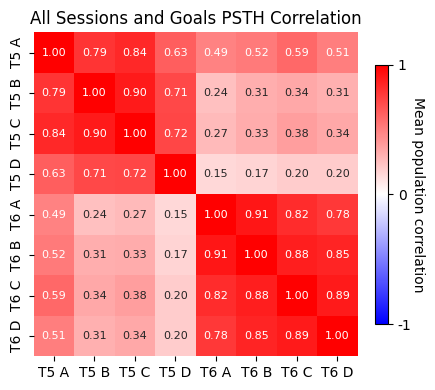

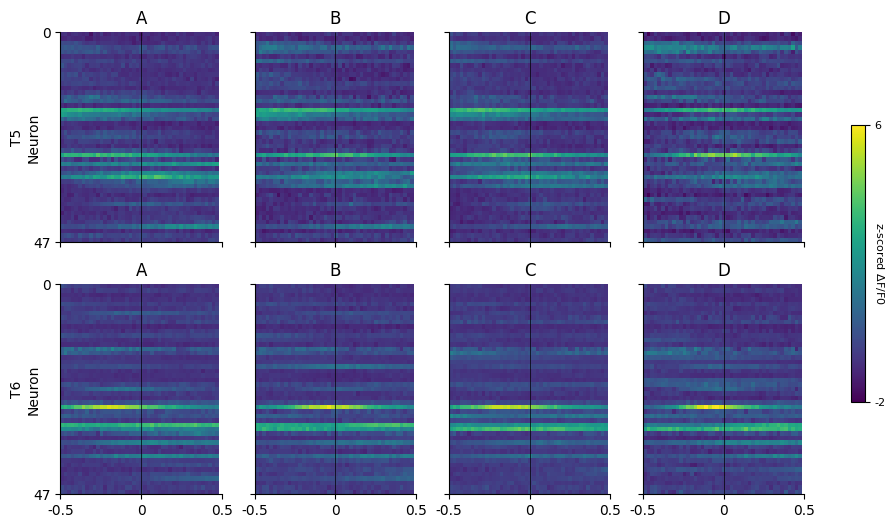

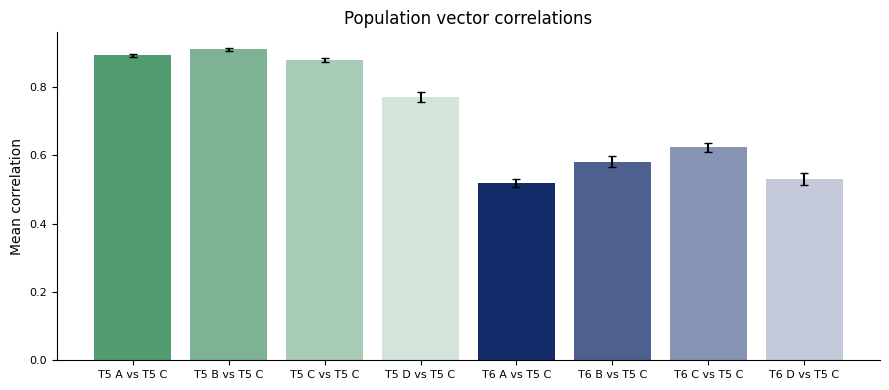

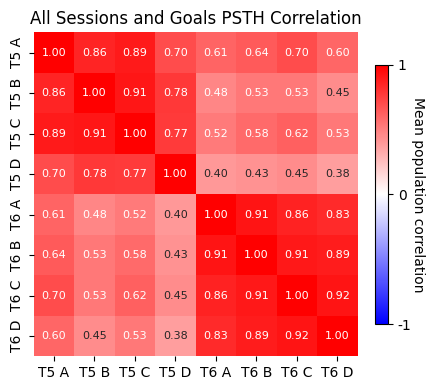

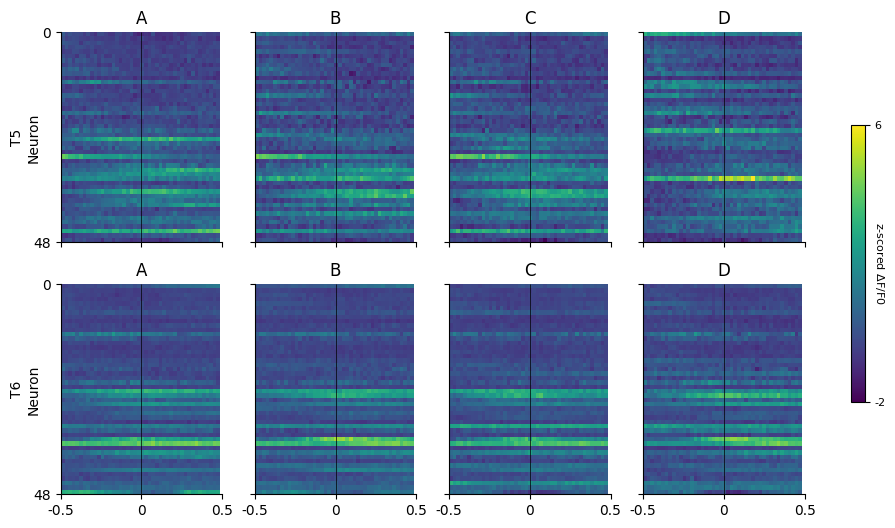

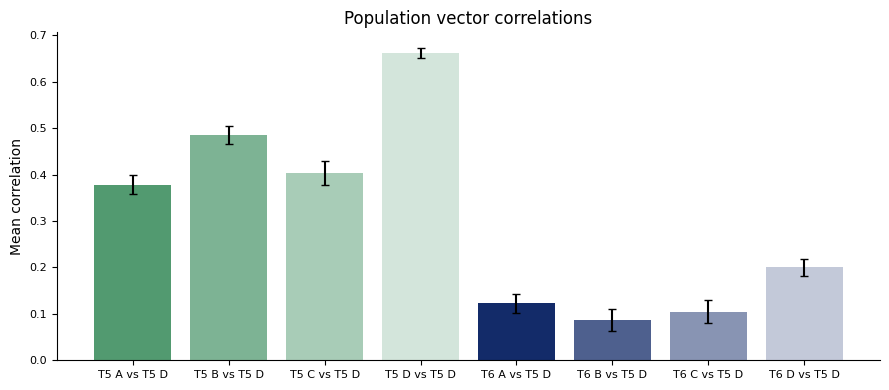

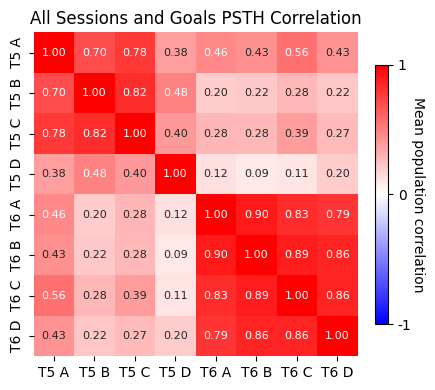

In [ ]:
## Get PSTH maps and their correlations for each goal compared
all_references = [(prot, goal) for prot in tracked_reward_id_tuned_idx.keys() for goal in tracked_reward_id_tuned_idx[prot].keys()]
goal_label_map = {1: 'A', 2: 'B', 3: 'C', 4: 'D', '1': 'A', '2': 'B', '3': 'C', '4': 'D', 'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}
ref_prot = 0  # session idx to use as reference i.e. how have things changed compared to that session

for ref_goal in tracked_reward_id_tuned_idx[ref_prot].keys():
    goal_id = goal_label_map.get(ref_goal, str(ref_goal))

    psths = {s: {goal: [] for goal in (ABCD_goals if protocol_nums[s] >= 5 else [1])} for s in range(num_sessions)}
    average_psths = {s: {goal: [] for goal in (ABCD_goals if protocol_nums[s] >= 5 else [1])} for s in range(num_sessions)}

    for s in range(num_sessions):
        # neurons = np.array(neurons_considered_sessions[s])[consistent_reward_id_tuned_neuron_idx[goal]]  # ids of tracked neurons that are consistently reward-tuned 
        neurons = np.array(neurons_considered_sessions[s])[tracked_reward_id_tuned_idx[ref_prot][ref_goal]]    # ids of tracked neurons that are reward-tuned and goal-specific in the *1st session*
        neuron_idx = np.where(np.isin(neurons_considered[s], neurons))[0]   # indices of these neurons inside their original list of neurons considered 

        for goal in ABCD_goals:
            if goal not in tracked_reward_id_tuned_idx[s]:
                continue
            # Extract the reward PSTHs for these neurons
            if 'reward_id_psth' in results_rewards[s]:
                psths[s][goal] = results_rewards[s]['reward_id_psth'][()][goal][neuron_idx]
                average_psths[s][goal] = results_rewards[s]['average_reward_id_psth'][()][goal][neuron_idx]
            else:
                psths[s][goal] = results_rewards[s]['reward_psth'][neuron_idx]
                average_psths[s][goal] = results_rewards[s]['average_reward_psth'][neuron_idx]
     
    neural_analysis_helpers.plot_all_sessions_goal_psth_map(average_psths, conditions=conditions, zscoring=True, ref_session=ref_prot, sorting_goal=ref_goal, \
                                    time_around=time_around, funcimg_frame_rate=45, save_plot=False, savepath=savepath, \
                                    savedir='RewardPSTH_RewardTunedNeurons', filename=f'ABCD_T{protocol_nums[ref_prot]}-Reward{goal_id}-TunedNeurons_PSTH_allSessions')

    # Get correlation among goals and across sessions compared to reference
    reference = all_references.index((ref_prot, ref_goal))
    if len(color_scheme[0]) != len(color_scheme[1]):  # TODO: do not hardcode
        colors = [color_scheme[0][0]] + color_scheme[1]
    else: 
        colors = [color for colors in color_scheme.values() for color in colors]

    _ = neural_analysis_helpers.get_map_correlation(psths, average_psths, conditions, population=True, zscoring=True, reference=reference, color_scheme=colors, \
                            save_plot=False, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons', \
                                filename=f'ABCD_FiringMap_correlation_T{protocol_nums[ref_prot]}-Reward{goal_id}-TunedNeurons')
    
    # Get correlation matrix among goals and across sessions 
    _ = neural_analysis_helpers.get_map_correlation_matrix(average_psths, conditions, population=True, zscoring=True, save_plot=False, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons',\
                                   filename=f'ABCD_FiringMap_correlationMatrix_T{protocol_nums[ref_prot]}-Reward{goal_id}-TunedNeurons')


##### T4 vs T5: Compare PSTH maps according to landmark id 

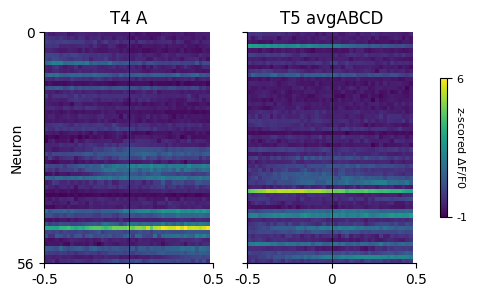

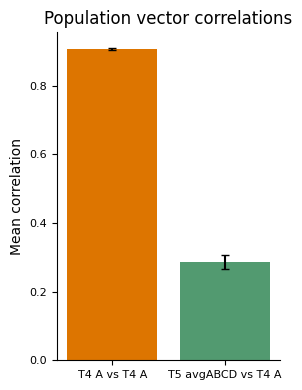

In [ ]:
# 1. Compare T4 reward PSTH vs T5 goal-average ABCD reward PSTH
if np.any(np.array(protocol_nums) >= 5):
    # conditions = [f'T{prot}' for prot in protocol_nums]
    conditions = [f'T{prot} A' if prot < 5 else f'T{prot} avgABCD' for p, prot in enumerate(protocol_nums)]
    goal_label_map = {1: 'A', 2: 'B', 3: 'C', 4: 'D', '1': 'A', '2': 'B', '3': 'C', '4': 'D', 'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}
    all_references = [(prot, goal) for prot in tracked_reward_id_tuned_idx.keys() for goal in tracked_reward_id_tuned_idx[prot].keys()]
    ref_prot = 0  # session idx to use as reference i.e. how have things changed compared to that session

    for ref_goal in tracked_reward_id_tuned_idx[ref_prot].keys():
        goal_id = goal_label_map.get(ref_goal, str(ref_goal))

        psths = {s: {goal: [] for goal in (ABCD_goals if protocol_nums[s] >= 5 else [1])} for s in range(num_sessions)}
        average_psths = {s: {goal: [] for goal in (ABCD_goals if protocol_nums[s] >= 5 else [1])} for s in range(num_sessions)}
        average_across_goals = {s: {1: []} for s in range(num_sessions)}
        psths_across_goals = {s: {1: []} for s in range(num_sessions)}

        for s in range(num_sessions):
            # neurons = np.array(neurons_considered_sessions[s])[consistent_reward_id_tuned_neuron_idx[goal]]  # ids of tracked neurons that are consistently reward-tuned 
            neurons = np.array(neurons_considered_sessions[s])[tracked_reward_id_tuned_idx[ref_prot][ref_goal]]    # ids of tracked neurons that are reward-tuned and goal-specific in the *1st session*
            neuron_idx = np.where(np.isin(neurons_considered[s], neurons))[0]   # indices of these neurons inside their original list of neurons considered 

            for goal in ABCD_goals:
                if goal not in tracked_reward_id_tuned_idx[s]:
                    continue
                # Extract the reward PSTHs for these neurons
                if 'reward_id_psth' in results_rewards[s]:
                    psths[s][goal] = results_rewards[s]['reward_id_psth'][()][goal][neuron_idx]
                    average_psths[s][goal] = results_rewards[s]['average_reward_id_psth'][()][goal][neuron_idx]  
        
                else:
                    psths[s][goal] = results_rewards[s]['reward_psth'][neuron_idx]
                    average_psths[s][goal] = results_rewards[s]['average_reward_psth'][neuron_idx]

            mean_goal_psths = [average_psths[s][goal] for goal in ABCD_goals if goal in average_psths[s] and len(average_psths[s][goal]) > 0]
            goal_psths = [psths[s][goal] for goal in ABCD_goals if goal in psths[s] and len(psths[s][goal] > 0)]
            
            if mean_goal_psths:  
                average_across_goals[s] = np.mean(np.stack(mean_goal_psths, axis=0), axis=0)  # average over goals (axis=0)
                psths_across_goals[s] = np.concatenate(goal_psths, axis=1)
            else:
                average_across_goals[s] = average_psths[s][goal]

        neural_analysis_helpers.plot_all_sessions_goal_psth_map(all_average_psths=average_across_goals, conditions=conditions, zscoring=True, ref_session=ref_prot, sorting_goal=1, \
                                        time_around=time_around, funcimg_frame_rate=45, save_plot=False, savepath=savepath, \
                                        savedir='RewardPSTH_RewardTunedNeurons', filename=f'A-avgABCD_T{protocol_nums[ref_prot]}-Reward{goal_id}-TunedNeurons_PSTH_allSessions')

        reference = all_references.index((ref_prot, ref_goal))
        _ = neural_analysis_helpers.get_map_correlation(psths=psths_across_goals, average_psths=average_across_goals, conditions=conditions, population=True, zscoring=True, reference=reference, \
                                color_scheme=[colors[0] for colors in color_scheme.values()], \
                                save_plot=False, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons', \
                                    filename=f'A-avgABCD_FiringMap_correlation_T{protocol_nums[ref_prot]}-Reward{goal_id}-TunedNeurons')
    

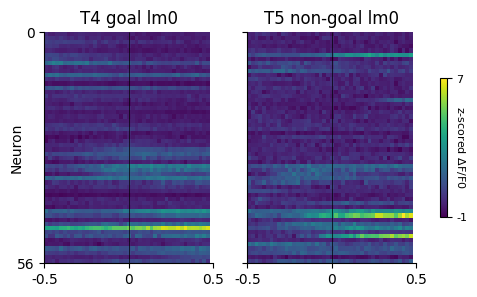

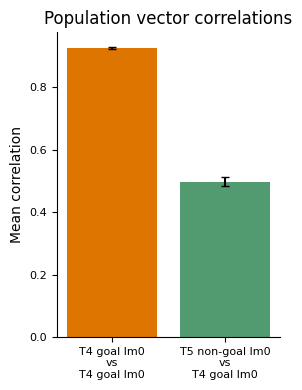

In [ ]:
# 2. Compare T4 reward PSTH vs T5 non-goal PSTH for that landmark 
if np.any(np.array(protocol_nums) >= 5):
    sess_goal = 0       # session where landmark of interest is goal
    sess_nongoal = 1    # session where landmark of interest is non-goal
    lm = session_struct[sess_goal]['goal_landmark_id']
    conditions = [f'T{prot} goal lm{lm}' if p == sess_goal else f'T{prot} non-goal lm{lm}' for p, prot in enumerate(protocol_nums)]
    goal_label_map = {1: 'A', 2: 'B', 3: 'C', 4: 'D', '1': 'A', '2': 'B', '3': 'C', '4': 'D', 'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}
    ref_goal = 1
    goal_id = goal_label_map.get(ref_goal, str(ref_goal))

    # Find landmark indices for landmark that is rewarded in T4 and not in T5
    lm_idx = np.where(session_struct[sess_nongoal]['all_lms'] == lm)[0]

    # Get 'reward' indices for these landmarks 
    lm_rew_idx = parse_session_functions.get_imag_rew_idx(session=session_struct[sess_nongoal], lm_idx=lm_idx)

    # Get PSTH for these events (use all neurons)
    nongoal_lm_id_psth, average_nongoal_lm_id_psth = neural_analysis_helpers.get_psth(data=session_data[sess_nongoal], neurons=neurons_considered[sess_nongoal], event_idx=lm_rew_idx, \
                                                                time_around=time_around)

    # Using reward-tuned neurons from sess_goal
    neurons = np.array(neurons_considered_sessions[sess_nongoal])[tracked_reward_id_tuned_idx[sess_goal][ref_goal]]    # ids of tracked neurons that are reward-tuned and goal-specific 
    neuron_idx = np.where(np.isin(neurons_considered[sess_nongoal], neurons))[0]   # indices of these neurons inside their original list of neurons considered 

    all_average_psths = [average_psths[sess_goal][ref_goal], average_nongoal_lm_id_psth[neuron_idx]]
    psths = [psths_across_goals[0], nongoal_lm_id_psth[neuron_idx]]

    neural_analysis_helpers.plot_all_sessions_goal_psth_map(all_average_psths=all_average_psths, conditions=conditions, zscoring=True, ref_session=0, sorting_goal=1, \
                                        time_around=time_around, funcimg_frame_rate=45, save_plot=False, savepath=savepath, \
                                        savedir='RewardPSTH_RewardTunedNeurons', filename=f'A-lm{lm}_T{protocol_nums[sess_goal]}-Reward{goal_id}-TunedNeurons_PSTH')

    _ = neural_analysis_helpers.get_map_correlation(psths=psths_across_goals, average_psths=all_average_psths, conditions=conditions, population=True, zscoring=True, \
                            reference=0, color_scheme=[colors[0] for colors in color_scheme.values()], \
                            save_plot=True, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons', \
                                filename=f'A-lm{lm}_FiringMap_correlation_T{protocol_nums[sess_goal]}-Reward{goal_id}-TunedNeurons')


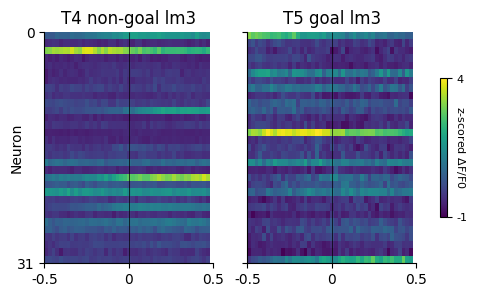

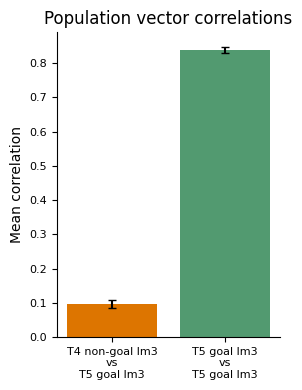

In [ ]:
# 3. Compare T4 non-goal PSTH vs T5 reward PSTH for that landmark
if np.any(np.array(protocol_nums) >= 5):
    sess_goal = 1       # session where landmark of interest is goal
    sess_nongoal = 0    # session where landmark of interest is non-goal
    lm = session_struct[sess_nongoal]['non_goal_landmark_id']
    conditions = [f'T{prot} goal lm{lm}' if p == sess_goal else f'T{prot} non-goal lm{lm}' for p, prot in enumerate(protocol_nums)]
    goal_label_map = {1: 'A', 2: 'B', 3: 'C', 4: 'D', '1': 'A', '2': 'B', '3': 'C', '4': 'D', 'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}
    ref_goal = (np.where(session_struct[sess_goal]['goal_landmark_id'] == session_struct[sess_nongoal]['non_goal_landmark_id'])[0] + 1)[0]
    goal_id = goal_label_map.get(ref_goal, str(ref_goal))

    # Find landmark indices for landmark that is rewarded in T5 and not in T4
    lm_idx = np.where(session_struct[sess_nongoal]['all_lms'] == lm)[0]

    # Get 'reward' indices for these landmarks 
    lm_rew_idx = parse_session_functions.get_imag_rew_idx(session=session_struct[sess_nongoal], lm_idx=lm_idx)

    # Get PSTH for these events (use all neurons)
    nongoal_lm_id_psth, average_nongoal_lm_id_psth = neural_analysis_helpers.get_psth(data=session_data[sess_nongoal], neurons=neurons_considered[sess_nongoal], event_idx=lm_rew_idx, \
                                                                time_around=time_around)

    # Using reward-tuned neurons from sess_goal for specific goal 
    neurons_goal = np.array(neurons_considered_sessions[sess_goal])[tracked_reward_id_tuned_idx[sess_goal][ref_goal]]    # ids of tracked neurons that are reward-tuned and goal-specific 
    neuron_idx_goal = np.where(np.isin(neurons_considered[sess_goal], neurons_goal))[0]   # indices of these neurons inside their original list of neurons considered 

    neurons_nongoal = np.array(neurons_considered_sessions[sess_nongoal])[tracked_reward_id_tuned_idx[sess_goal][ref_goal]]
    neuron_idx_nongoal = np.where(np.isin(neurons_considered[sess_nongoal], neurons_nongoal))[0]

    average_psths = [average_nongoal_lm_id_psth[neuron_idx_nongoal], results_rewards[s]['average_reward_id_psth'][()][ref_goal][neuron_idx_goal]]
    psths = [nongoal_lm_id_psth[neuron_idx_nongoal], results_rewards[s]['reward_id_psth'][()][ref_goal][neuron_idx_goal]]

    neural_analysis_helpers.plot_all_sessions_goal_psth_map(all_average_psths=average_psths, conditions=conditions, zscoring=True, ref_session=1, sorting_goal=1, \
                                        time_around=time_around, funcimg_frame_rate=45, save_plot=False, savepath=savepath, \
                                        savedir='RewardPSTH_RewardTunedNeurons', filename=f'B-lm{lm}_T{protocol_nums[sess_goal]}-Reward{goal_id}-TunedNeurons_PSTH')

    _ = neural_analysis_helpers.get_map_correlation(psths=psths, average_psths=average_psths, conditions=conditions, population=True, zscoring=True, reference=1, \
                            color_scheme=[colors[0] for colors in color_scheme.values()], \
                            save_plot=True, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons', \
                                filename=f'B-lm{lm}_FiringMap_correlation_T{protocol_nums[sess_goal]}-Reward{goal_id}-TunedNeurons')


##### T3 vs T4: Compare PSTH maps according to landmark id 

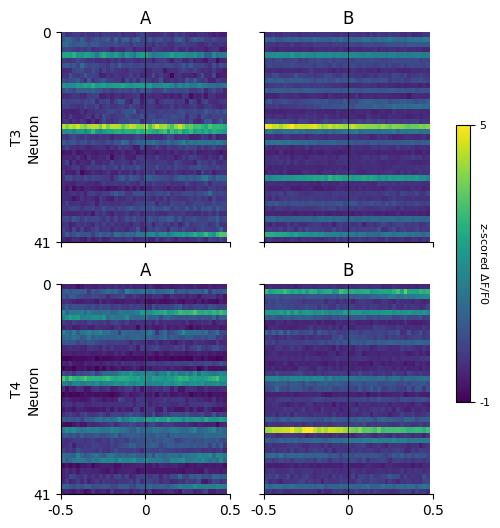

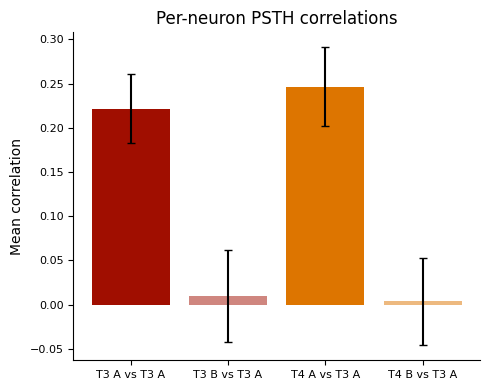

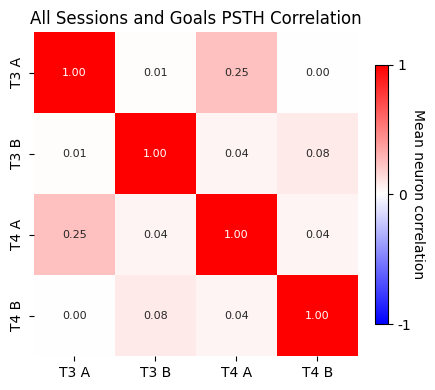

In [ ]:
# 1. Compare T3 reward vs T4 reward vs T3 non-goal vs T4 non-goal PSTH 
if np.all(protocol_nums) < 5:

    sess_goal = 0       # session where landmark of interest is goal
    lmA = session_struct[sess_goal]['goal_landmark_id']
    lmB = session_struct[sess_goal]['non_goal_landmark_id']
    conditions = [s for prot in protocol_nums for s in (f'T{prot} A', f'T{prot} B')]
    # color_scheme = palettes.met_brew('Johnson', n=len(protocol_nums), brew_type="continuous")
    goal_label_map = {1: 'A', 2: 'B', 3: 'C', 4: 'D', '1': 'A', '2': 'B', '3': 'C', '4': 'D', 'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}
    ref_goal = 1
    ref_prot = 0
    all_references = [(prot, goal) for prot in tracked_reward_id_tuned_idx.keys() for goal in range(1,3)]
    goal_id = goal_label_map.get(ref_goal, str(ref_goal))

    # Find landmark indices for landmark that is rewarded in T3 and T4
    psths = {s: {} for s in range(num_sessions)}
    average_psths = {s: {} for s in range(num_sessions)}

    for s in range(num_sessions):
        # Using reward-tuned neurons from sess_goal
        neurons = np.array(neurons_considered_sessions[s])[tracked_reward_id_tuned_idx[ref_prot][ref_goal]]    # ids of tracked neurons that are reward-tuned and goal-specific 
        neuron_idx = np.where(np.isin(neurons_considered[s], neurons))[0]   # indices of these neurons inside their original list of neurons considere

        for id in range(1,3):
            if id == 1:                
                psths[s][id] = results_rewards[s]['reward_psth'][neuron_idx] # TODO neurons
                average_psths[s][id] = results_rewards[s]['average_reward_psth'][neuron_idx]
            else:
                # Get 'reward' indices for these landmarks 
                lm_idxB = np.where(session_struct[s]['all_lms'] == session_struct[s]['non_goal_landmark_id'])[0]
                lm_rew_idx = parse_session_functions.get_imag_rew_idx(session=session_struct[s], lm_idx=lm_idxB)

                # Get PSTH for these events (use all neurons)
                nongoal_lm_id_psth, average_nongoal_lm_id_psth = neural_analysis_helpers.get_psth(data=session_data[s], neurons=neurons_considered[s], event_idx=lm_rew_idx, \
                                                                time_around=time_around)
                psths[s][id] = nongoal_lm_id_psth[neuron_idx]
                average_psths[s][id] = average_nongoal_lm_id_psth[neuron_idx]


    neural_analysis_helpers.plot_all_sessions_goal_psth_map(all_average_psths=average_psths, conditions=conditions, zscoring=True, ref_session=ref_prot, sorting_goal=1, \
                                    time_around=time_around, funcimg_frame_rate=45, save_plot=False, savepath=savepath, \
                                    savedir='RewardPSTH_RewardTunedNeurons', filename=f'AB-AB_T{protocol_nums[ref_prot]}-Reward{goal_id}-TunedNeurons_PSTH_allSessions')

    reference = all_references.index((ref_prot, ref_goal))
    _ = neural_analysis_helpers.get_map_correlation(psths=psths, average_psths=average_psths, conditions=conditions, population=False, zscoring=True, reference=reference, color_scheme=np.concatenate([colors[:] for colors in color_scheme.values()]), \
                            save_plot=False, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons', \
                                filename=f'AB-AB_FiringMap_correlation_T{protocol_nums[ref_prot]}-Reward{goal_id}-TunedNeurons')

    _ = neural_analysis_helpers.get_map_correlation_matrix(all_average_psths=average_psths, conditions=conditions, population=False, zscoring=True, save_plot=False, savepath=savepath, savedir='RewardPSTH_RewardTunedNeurons', \
                                    filename=f'AB-AB_FiringMap_correlationMatrix_T{protocol_nums[ref_prot]}-Reward{goal_id}-TunedNeurons')



##### Neuronal overlap analysis

In [ ]:
# Find the overlap in reward-tuned neurons among goals in each session 
save_plot = False

ABCD_goals = [1,2,3,4]
goal_ids = ['A','B','C','D']
conditions = [f'T{prot} {goal}' if prot >= 5 else f'T{prot} A' for prot in protocol_nums for goal in (goal_ids if prot >= 5 else ['A'])]

for s in range(num_sessions):
    if protocol_nums[s] >= 5:
        neuron_overlap_matrix = np.zeros((len(ABCD_goals), len(ABCD_goals)))

        # Find overlapping neurons
        for i, goal in enumerate(ABCD_goals):
            for j, goal_test in enumerate(ABCD_goals):

                neurons1 = neurons_considered[s][significant_neurons_reward_id[s][()][goal]]
                neurons2 = neurons_considered[s][significant_neurons_reward_id[s][()][goal_test]]
                
                overlap = len(np.where(np.isin(neurons1, neurons2))[0])
                perc_overlap = overlap / len(neurons1)
                
                neuron_overlap_matrix[i,j] = perc_overlap
        
        # Plotting
        fig, ax = plt.subplots(figsize=(5,4))
        h = sns.heatmap(neuron_overlap_matrix, 
                    annot=True,        
                    fmt=".2f",          
                    cmap="viridis", 
                    vmin=0, vmax=1, 
                    cbar=True,         
                    xticklabels=goal_ids, 
                    yticklabels=goal_ids, 
                    ax=ax)
        
        cbar = h.collections[0].colorbar
        cbar.set_label('Overlap fraction', rotation=270, labelpad=10)  
        cbar.set_ticks([0, 1])
        cbar.set_ticklabels(['0', '1'])
        ax.set_title(f'Neuron Overlap Matrix - T{protocol_nums[s]}')
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')

        plt.tight_layout()

        if save_plot:
            output_path = os.path.join(savepath, 'RewardPSTH_RewardTunedNeurons')
            if not os.path.exists(output_path):
                os.makedirs(output_path)
            plt.savefig(os.path.join(output_path, f'neuron_goal_overlap_matrix_T{protocol_nums[s]}.png'))


# Find the overlap in reward-tuned neurons among goals aross sessions
# conditions = [f'T{prot} {goal}' for prot in protocol_nums for goal in goal_ids]

neuron_overlap_matrix = np.zeros((len(conditions), len(conditions)))
neurons1 = [{} for _ in range(len(conditions))]

counter = 0
for s in range(num_sessions):
    for i, goal in enumerate(ABCD_goals):
        if goal not in tracked_reward_id_tuned_idx[s]:
            continue
        neurons1[counter] = tracked_reward_id_tuned_idx[s][goal] 
        counter += 1

for i in range(counter):
    for j in range(counter):
        overlap = len(np.where(np.isin(neurons1[i], neurons1[j]))[0])
        perc_overlap = overlap / len(neurons1[i])
        neuron_overlap_matrix[i,j] = perc_overlap

# Plotting  
fig, ax = plt.subplots(figsize=(5,4))
h = sns.heatmap(neuron_overlap_matrix, 
            annot=True,        
            fmt=".2f",          
            cmap="viridis", 
            vmin=0, vmax=1, 
            cbar=True,         
            xticklabels=conditions, 
            yticklabels=conditions, 
            ax=ax)

cbar = h.collections[0].colorbar
cbar.set_label('Overlap fraction', rotation=270, labelpad=10)  
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['0', '1'])
ax.set_title(f'Neuron Overlap Matrix')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')

plt.tight_layout()

if save_plot:
    output_path = os.path.join(savepath, 'RewardPSTH_RewardTunedNeurons')
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(os.path.join(output_path, f'neuron_goal_overlap_matrix_allSessions.png'))

In [ ]:
# What do goal-specific neurons do across sessions? 
save_plot = False
plotting = True

ABCD_goals = [1,2,3,4]
goal_ids = ['A','B','C','D']
conditions = [f'T{prot} {goal}' if prot >= 5 else f'T{prot} A' for prot in protocol_nums for goal in (goal_ids if prot >= 5 else ['A'])]

# Find neurons that are goal-specific for each goal and session
unique_neurons = {s: {goal: [] for goal in (ABCD_goals if protocol_nums[s] >= 5 else [1])} for s in range(num_sessions)}

for s in range(num_sessions):
    if len(tracked_reward_id_tuned_idx[s].keys()) == 1:
        goal = list(tracked_reward_id_tuned_idx[s].keys())[0]
        unique_neurons[s][goal] = tracked_reward_id_tuned_idx[s][goal]
    else:
        for goal in ABCD_goals:
            if goal not in tracked_reward_id_tuned_idx[s]:
                continue
            neurons_other_goals = list(set().union(*[tracked_reward_id_tuned_idx[s][g] for g in ABCD_goals if g != goal and g in tracked_reward_id_tuned_idx[s]]))
            unique_neurons[s][goal] = np.setdiff1d(tracked_reward_id_tuned_idx[s][goal], neurons_other_goals)

# Find overlap of goal-specific neurons with goal-specific neurons in other sessions
neuron_overlap_matrix = np.zeros((len(conditions), len(conditions)))
neurons1 = [{} for _ in range(len(conditions))]

counter = 0
for s in range(num_sessions):
    for i, goal in enumerate(ABCD_goals):
        if goal not in unique_neurons[s]:
            continue
        neurons1[counter] = unique_neurons[s][goal] 
        counter += 1

for i in range(counter):
    for j in range(counter):
        overlap = len(np.intersect1d(neurons1[i], neurons1[j]))
        perc_overlap = overlap / len(neurons1[i])
        neuron_overlap_matrix[i,j] = perc_overlap

# Plotting
if plotting:
    goals_per_session = [[g for g in ABCD_goals if g in tracked_reward_id_tuned_idx[s]] for s in range(num_sessions)]
    rows = [0 * len(goals_per_session[0]) + g for g in range(len(goals_per_session[0]))]
    cols = [1 * len(goals_per_session[0]) + g for g in range(len(goals_per_session[1]))]
    
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    ax = ax.ravel()

    # Plot T_early vs T_late
    xticklabels = [goal_label_map.get(g, str(g)) for g in goals_per_session[1]]
    yticklabels = [goal_label_map.get(g, str(g)) for g in goals_per_session[0]]

    t5_vs_t6 = neuron_overlap_matrix[np.ix_(rows, cols)]
    h1 = sns.heatmap(t5_vs_t6, annot=True, fmt=".2f", cmap="viridis",
                xticklabels=xticklabels,
                yticklabels=yticklabels,
                cbar=False, ax=ax[0],
                vmin=0, vmax=1, square=True)
    ax[0].set_title(f"T{protocol_nums[0]} vs T{protocol_nums[1]}: Unique Neuron Overlap")
    ax[0].set_xlabel(f"T{protocol_nums[1]} Goals")
    ax[0].set_ylabel(f"T{protocol_nums[0]} Goals")
    ax[0].set_box_aspect(1)

    # Plot T_late vs T_early
    t6_vs_t5 = neuron_overlap_matrix[np.ix_(cols, rows)]
    h2 = sns.heatmap(t6_vs_t5, annot=True, fmt=".2f", cmap="viridis",
                xticklabels=yticklabels,
                yticklabels=xticklabels,
                cbar=False, ax=ax[1],
                vmin=0, vmax=1, square=True)
    ax[1].set_title(f"T{protocol_nums[1]} vs T{protocol_nums[0]}: Unique Neuron Overlap")
    ax[1].set_xlabel(f"T{protocol_nums[0]} Goals")
    ax[1].set_ylabel(f"T{protocol_nums[1]} Goals")
    ax[1].set_box_aspect(1)

    cbar = fig.colorbar(h1.collections[0], ax=ax[0], orientation='vertical', fraction=0.03, pad=0.04)
    cbar.set_label('Overlap fraction', rotation=270, labelpad=10)  
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['0', '1'])
    cbar = fig.colorbar(h2.collections[0], ax=ax[1], orientation='vertical', fraction=0.03, pad=0.04)
    cbar.set_label('Overlap fraction', rotation=270, labelpad=10)  
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['0', '1'])

    plt.tight_layout()

    if save_plot:
        output_path = os.path.join(savepath, 'RewardPSTH_RewardTunedNeurons')
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        plt.savefig(os.path.join(output_path, f'neuron_uniqueGoal_overlap_matrix.png'))


In [ ]:
# Find overlap of goal-specific neurons with other reward-tuned neurons (unique and agnostic) in other goals in other sessions
save_plot = False
plotting = True

neuron_overlap_matrix = np.zeros((len(conditions), len(conditions)))
neurons1 = [{} for _ in range(len(conditions))]
neurons2 = [{} for _ in range(len(conditions))]

counter = 0
for s in range(num_sessions):
    for i, goal in enumerate(ABCD_goals):
        if goal not in unique_neurons[s] or goal not in tracked_reward_id_tuned_idx[s]:
            continue
        neurons1[counter] = unique_neurons[s][goal] 
        neurons2[counter] = tracked_reward_id_tuned_idx[s][goal]
        counter += 1

for i in range(counter):
    for j in range(counter):
        overlap = len(np.intersect1d(neurons1[i], neurons2[j]))
        perc_overlap = overlap / len(neurons1[i])
        neuron_overlap_matrix[i,j] = perc_overlap

# Plot the overlap across sessions
if plotting:
    goals_per_session = [[g for g in ABCD_goals if g in tracked_reward_id_tuned_idx[s]] for s in range(num_sessions)]
    rows = [0 * len(goals_per_session[0]) + g for g in range(len(goals_per_session[0]))]
    cols = [1 * len(goals_per_session[0]) + g for g in range(len(goals_per_session[1]))]
    
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    ax = ax.ravel()

    # Plot T_early vs T_late
    xticklabels = [goal_label_map.get(g, str(g)) for g in goals_per_session[1]]
    yticklabels = [goal_label_map.get(g, str(g)) for g in goals_per_session[0]]

    # Plot T5 vs T6
    t5_vs_t6 = neuron_overlap_matrix[np.ix_(rows, cols)]
    h1 = sns.heatmap(t5_vs_t6, annot=True, fmt=".2f", cmap="viridis",
                xticklabels=xticklabels,
                yticklabels=yticklabels,
                cbar=False, ax=ax[0],
                vmin=0, vmax=1, square=True)
    ax[0].set_title(f"T{protocol_nums[0]} vs T{protocol_nums[1]}: Unique vs Agnostic Neuron Overlap", fontsize=10)
    ax[0].set_xlabel(f"T{protocol_nums[1]} Goals")
    ax[0].set_ylabel(f"T{protocol_nums[0]} Goals")
    ax[0].set_box_aspect(1)

    # Plot T6 vs T5
    t6_vs_t5 = neuron_overlap_matrix[np.ix_(cols, rows)]
    h2 = sns.heatmap(t6_vs_t5, annot=True, fmt=".2f", cmap="viridis",
                xticklabels=yticklabels,
                yticklabels=xticklabels,
                cbar=False, ax=ax[1],
                vmin=0, vmax=1, square=True)
    ax[1].set_title(f"T{protocol_nums[1]} vs T{protocol_nums[0]}: Unique vs Agnostic Neuron Overlap", fontsize=10)
    ax[1].set_xlabel(f"T{protocol_nums[0]} Goals")
    ax[1].set_ylabel(f"T{protocol_nums[1]} Goals")
    ax[1].set_box_aspect(1)

    cbar = fig.colorbar(h1.collections[0], ax=ax[0], orientation='vertical', fraction=0.03, pad=0.04)
    cbar.set_label('Overlap fraction', rotation=270, labelpad=10)  
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['0', '1'])
    cbar = fig.colorbar(h2.collections[0], ax=ax[1], orientation='vertical', fraction=0.03, pad=0.04)
    cbar.set_label('Overlap fraction', rotation=270, labelpad=10)  
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['0', '1'])

    plt.tight_layout()

    if save_plot:
        output_path = os.path.join(savepath, 'RewardPSTH_RewardTunedNeurons')
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        plt.savefig(os.path.join(output_path, f'neuron_uniqueGoal_vs_agnosticGoal_overlap_matrix.png'))


##### Saving some info 

In [36]:
# Save neuron ids to visualize them later
filename = os.path.join(savepath, 'tracked_reward_tuned_neurons.npz')
tracked_neurons_save = {}
tracked_neurons_save['tracked_reward_id_tuned_idx'] = tracked_reward_id_tuned_idx
tracked_neurons_save['neurons_considered_sessions'] = neurons_considered_sessions
tracked_neurons_save['unique_neurons'] = unique_neurons
np.savez(filename, **tracked_neurons_save)


NameError: name 'unique_neurons' is not defined